#Text Summarization:
Text summarization is the process of condensing a longer piece of text into a shorter version, capturing only the main ideas and essential information while omitting details and examples. The goal is to provide a brief overview of the original content.
Example: Summarizing a 10-page article into a one-paragraph summary.

#Text Paraphrasing:
Text paraphrasing is the process of rewriting a text in different words and sentence structures while retaining the original meaning. The length of the text may remain similar, but the wording is changed to improve clarity, avoid plagiarism, or suit a different context.
Example: Rewriting a sentence like “The cat sat on the mat” to “The mat was occupied by the cat.”

#Session Setup
Let's get our environment ready by installing and importing the necessary libraries.


In [ ]:
#@title 0.1: Install and Import Libraries
# Install the required libraries quietly.
!pip install transformers sentencepiece --quiet
print("✅ Libraries installed.")

# Import the necessary classes from the transformers library.
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
# 'textwrap' is a great tool for formatting our output nicely.
import textwrap
print("✅ Libraries imported successfully.")

✅ Libraries installed.
✅ Libraries imported successfully.


#Extractive Summarization:
Extractive summarization works by selecting important sentences, phrases, or paragraphs directly from the original text and combining them to create a summary. It does not generate new words or phrases, just extracts the key content.
Example: Picking the top 3 sentences from an article that convey the main points.

#Abstractive Summarization:
Abstractive summarization generates a summary by rephrasing and interpreting the original text, possibly using new words or sentences. It aims to capture the core meaning in a concise and natural way, similar to how a human would summarize.
Example: Reading a paragraph about climate change and writing a new sentence like “Global warming is causing significant environmental changes.”

In [ ]:
#@title 1.2: Load the T5 Model and Tokenizer
# The model name we'll be using.
t5_model_name = 't5-base'

# The Tokenizer is responsible for converting text into a format the model understands.
t5_tokenizer = T5Tokenizer.from_pretrained(t5_model_name)

# The Model is the pre-trained AI that performs the summarization.
t5_model = T5ForConditionalGeneration.from_pretrained(t5_model_name)

print(f"✅ T5 Model ('{t5_model_name}') is loaded and ready!")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

✅ T5 Model ('t5-base') is loaded and ready!


#The Summarizer Function
This is our core function. We're adding a new parameter, no_repeat_ngram_size, to prevent the model from repeating the same phrases.

In [ ]:
#@title 1.3: Define the Core Summarizer Function
def generate_summary(text, min_len=40, max_len=120, beams=4):
    """
    Generates a high-quality abstractive summary for a given text using the T5 model.
    """
    # T5 models require a "summarize: " prefix to know which task to perform.
    input_text = "summarize: " + text.strip().replace("\n", " ")

    # Tokenize the text, ensuring it's not too long for the model.
    inputs = t5_tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)

    # Generate the summary using our specified parameters.
    summary_ids = t5_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3, # Prevents repeating phrases of 3 words.
        length_penalty=2.0,
        early_stopping=True
    )

    # Decode the result back into human-readable text.
    summary = t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

#Code Examples with Diverse Texts
Let's test our summarizer on different styles of writing to see how it performs.

In [ ]:
#@title 1.4.1: Example 1
import textwrap

# List of your text files
file_paths = ["input1.txt", "input2.txt"]  # add more files as needed

for file_path in file_paths:
    # Read the file
    text = read_text(file_path)

    # Generate summary (adjust min_len and max_len as needed)
    summary = generate_summary(text, min_len=25, max_len=50)

    # Display results
    print(f"\n----------- ORIGINAL TEXT: {file_path} -----------")
    print(textwrap.fill(text, width=100))
    print(f"\n✨---------- SUMMARY ({file_path}) -----------✨")
    print(textwrap.fill(summary, width=100))



----------- ORIGINAL TEXT: input1.txt -----------
Artificial Intelligence (AI) has emerged as one of the most transformative technologies of the 21st
century. Over the past decade, its rapid evolution has reshaped industries, economies, and daily
life in ways that were once confined to science fiction. From virtual assistants on smartphones to
recommendation algorithms on streaming platforms, AI is now embedded into the very fabric of our
digital experience. Its potential continues to grow as advances in machine learning, natural
language processing, and computer vision unlock new applications across healthcare, education,
finance, and beyond.  In conclusion, Artificial Intelligence stands at a crossroads of opportunity
and responsibility. It has the potential to revolutionize human life for the better, but only if
guided by thoughtful governance and ethical practices. The choices made today will determine whether
AI becomes a tool for empowerment and equity or a source of division an

In [ ]:
#@title 1.4.2: Example 2
import textwrap

# List of your text files
file_paths = ["input1.txt", "input2.txt"]  # add your files here

for file_path in file_paths:
    # Read the text from the file
    text = read_text(file_path)

    # Generate summary using your summarization model
    summary = generate_summary(text, min_len=30, max_len=90)

    # Display original text and summary
    print(f"\n----------- ORIGINAL TEXT: {file_path} -----------")
    print(textwrap.fill(text, width=100))
    print(f"\n✨---------- SUMMARY ({file_path}) -----------✨")
    print(textwrap.fill(summary, width=100))



----------- ORIGINAL TEXT: input1.txt -----------
Artificial Intelligence (AI) has emerged as one of the most transformative technologies of the 21st
century. Over the past decade, its rapid evolution has reshaped industries, economies, and daily
life in ways that were once confined to science fiction. From virtual assistants on smartphones to
recommendation algorithms on streaming platforms, AI is now embedded into the very fabric of our
digital experience. Its potential continues to grow as advances in machine learning, natural
language processing, and computer vision unlock new applications across healthcare, education,
finance, and beyond.  In conclusion, Artificial Intelligence stands at a crossroads of opportunity
and responsibility. It has the potential to revolutionize human life for the better, but only if
guided by thoughtful governance and ethical practices. The choices made today will determine whether
AI becomes a tool for empowerment and equity or a source of division an

#The Interactive Summarizer Studio
Now it's your turn! Paste your own text, experiment with the settings, and see how you can craft the perfect summary.

In [ ]:
#@title 1.5: Your Interactive Summarizer Studio! ⚡️

import textwrap

# List of your text files
file_paths = ["input1.txt", "input2.txt"]  # add your files here

# Summarization parameters
min_length = 45
max_length = 140
num_beams = 5

for file_path in file_paths:
    # Read the text from the file
    text = read_text(file_path)

    # Generate summary
    generated_summary = generate_summary(
        text,
        min_len=min_length,
        max_len=max_length,
        beams=num_beams
    )

    # Compute basic analysis
    original_word_count = len(text.split())
    summary_word_count = len(generated_summary.split())
    reduction = 100 - (summary_word_count / original_word_count * 100)

    # Display results
    print(f"\n----------- ORIGINAL TEXT: {file_path} -----------")
    print(textwrap.fill(text, width=100))

    print(f"\n✨---------- GENERATED SUMMARY ({file_path}) -----------✨")
    print(textwrap.fill(generated_summary, width=100))

    print(f"\n📊---------- ANALYSIS ({file_path}) -----------📊")
    print(f"Original Word Count: {original_word_count}")
    print(f"Summary Word Count: {summary_word_count}")
    print(f"Text Reduction: {reduction:.1f}%")



----------- ORIGINAL TEXT: input1.txt -----------
Artificial Intelligence (AI) has emerged as one of the most transformative technologies of the 21st
century. Over the past decade, its rapid evolution has reshaped industries, economies, and daily
life in ways that were once confined to science fiction. From virtual assistants on smartphones to
recommendation algorithms on streaming platforms, AI is now embedded into the very fabric of our
digital experience. Its potential continues to grow as advances in machine learning, natural
language processing, and computer vision unlock new applications across healthcare, education,
finance, and beyond.  In conclusion, Artificial Intelligence stands at a crossroads of opportunity
and responsibility. It has the potential to revolutionize human life for the better, but only if
guided by thoughtful governance and ethical practices. The choices made today will determine whether
AI becomes a tool for empowerment and equity or a source of division an

In [ ]:
!pip install transformers sentencepiece sentence-transformers scikit-learn matplotlib pandas --quiet
print("✅ Libraries installed.")

✅ Libraries installed.


#Importing Libraries

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import textwrap
import re
import requests
import ssl
from transformers import T5ForConditionalGeneration, T5Tokenizer
from transformers import BartForConditionalGeneration, BartTokenizer
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

# Handle SSL for file downloads
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

print("✅ Libraries imported.")

✅ Libraries imported.


#Load T5, BART, and PEGASUS for summarization.

In [ ]:
t5_tokenizer = T5Tokenizer.from_pretrained('t5-base')
t5_model = T5ForConditionalGeneration.from_pretrained('t5-base')
bart_tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')
bart_model = BartForConditionalGeneration.from_pretrained('facebook/bart-base')
pegasus_sum_tokenizer = PegasusTokenizer.from_pretrained('google/pegasus-xsum')
pegasus_sum_model = PegasusForConditionalGeneration.from_pretrained('google/pegasus-xsum')
print("✅ Summarization models loaded: T5, BART, PEGASUS.")

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

✅ Summarization models loaded: T5, BART, PEGASUS.


#T5 Summarization
T5 (Text-to-Text Transfer Transformer) is a transformer model that frames all NLP tasks, including summarization, as text-to-text problems. For summarization, it generates concise, natural-language summaries by rephrasing and condensing the original text rather than simply extracting sentences. This makes T5 a powerful and flexible model for various tasks like translation, question answering, and text classification.

In [ ]:
def generate_t5_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with T5."""
    input_text = "summarize: " + text.strip().replace("\n", " ")
    inputs = t5_tokenizer.encode(input_text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = t5_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return t5_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [ ]:
def clean_text(text):
    """Remove special characters and normalize whitespace."""
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text)  # Normalize whitespace
    return text.strip()

#BART Summarization
BART (Bidirectional and Auto-Regressive Transformers) is a powerful sequence-to-sequence transformer model designed for tasks like abstractive summarization. It combines the bidirectional encoding of BERT with the autoregressive decoding of GPT, allowing it to understand the full context of the input text and generate concise, fluent summaries in natural language. Unlike extractive methods that select sentences directly from the text, BART can rephrase and create new sentences while preserving the original meaning, making it effective for summarizing complex or lengthy documents. It is widely used in NLP tasks such as summarization, translation, and text generation due to its versatility and high performance.

In [ ]:
def generate_bart_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with BART."""
    inputs = bart_tokenizer.encode(text, return_tensors='pt', max_length=1024, truncation=True)
    summary_ids = bart_model.generate(
        inputs,
        max_length=max_len,
        min_length=min_len,
        num_beams=beams,
        no_repeat_ngram_size=3,
        length_penalty=2.0,
        early_stopping=True
    )
    return bart_tokenizer.decode(summary_ids[0], skip_special_tokens=True)

#PEGASUS Summarization
PEGASUS is a transformer-based model designed for abstractive summarization, pre-trained by predicting masked “gap” sentences to learn how to generate coherent summaries. It produces concise and fluent summaries by understanding the context and meaning of the original text rather than simply extracting sentences.

In [ ]:
def generate_pegasus_summary(text, min_len=40, max_len=150, beams=4):
    """Abstractive summarization with PEGASUS."""
    # Clean and truncate input to prevent tokenization issues
    text = clean_text(text[:1500])  # Stricter truncation to 1500 chars
    try:
        inputs = pegasus_sum_tokenizer.encode(
            text,
            return_tensors='pt',
            max_length=512,  # Reduced max_length for safety
            truncation=True,
            padding='max_length'  # Ensure consistent input size
        )
        # Validate token IDs
        if inputs.max().item() >= pegasus_sum_tokenizer.vocab_size:
            raise ValueError(f"Token ID {inputs.max().item()} exceeds vocab size {pegasus_sum_tokenizer.vocab_size}.")
        summary_ids = pegasus_sum_model.generate(
            inputs,
            max_length=max_len,
            min_length=min_len,
            num_beams=beams,
            no_repeat_ngram_size=3,
            length_penalty=2.0,
            early_stopping=True
        )
        return pegasus_sum_tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    except Exception as e:
        print(f"PEGASUS summarization failed: {e}")
        return "Summary unavailable due to processing error."

#PARAPHRASING
Paraphrasing is the process of rewording or rephrasing text while preserving its original meaning. It is often used to improve clarity, simplify complex sentences, or avoid plagiarism. Paraphrasing can involve changing words, sentence structures, or the overall style of the text. Unlike summarization, it does not reduce the length of the content significantly but focuses on expressing the same ideas in a different way.

In [ ]:
#@title  Load the PEGASUS Model and Tokenizer
paraphrase_model_name = 'tuner007/pegasus_paraphrase'

pegasus_tokenizer = PegasusTokenizer.from_pretrained(paraphrase_model_name)
pegasus_model = PegasusForConditionalGeneration.from_pretrained(paraphrase_model_name)

print(f"✅ PEGASUS Model ('{paraphrase_model_name}') is loaded and ready!")

tokenizer_config.json:   0%|          | 0.00/86.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at tuner007/pegasus_paraphrase and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ PEGASUS Model ('tuner007/pegasus_paraphrase') is loaded and ready!


In [ ]:
#@title  Define the Core Paraphraser Function
def generate_paraphrases(text, num_return=5, beams=10):
    """
    Generates multiple high-quality paraphrases for a given text using the PEGASUS model.
    """
    # Tokenize the input text.
    inputs = pegasus_tokenizer.encode(text, return_tensors='pt', truncation=True)

    # Generate the paraphrases using beam search.
    paraphrase_ids = pegasus_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )

    # Decode the results back into text.
    paraphrases = pegasus_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)
    return paraphrases

#Code Examples with Diverse Sentences

In [ ]:
# List of your text files
file_paths = ["input1.txt", "input2.txt"]  # add your files here

# Number of paraphrases to generate
num_paraphrases = 4

for file_path in file_paths:
    # Read the text from the file
    text = read_text(file_path)

    # Generate paraphrases
    paraphrases = generate_paraphrases(text, num_return=num_paraphrases)

    # Display results
    print(f"\n----------- ORIGINAL TEXT: {file_path} -----------")
    print(textwrap.fill(text, width=100))

    print(f"\n🤖---------- PEGASUS PARAPHRASES ({file_path}) ----------🤖")
    for i, p in enumerate(paraphrases):
        print(f"  {i+1}. {p}")



----------- ORIGINAL TEXT: input1.txt -----------
Artificial Intelligence (AI) has emerged as one of the most transformative technologies of the 21st
century. Over the past decade, its rapid evolution has reshaped industries, economies, and daily
life in ways that were once confined to science fiction. From virtual assistants on smartphones to
recommendation algorithms on streaming platforms, AI is now embedded into the very fabric of our
digital experience. Its potential continues to grow as advances in machine learning, natural
language processing, and computer vision unlock new applications across healthcare, education,
finance, and beyond.  In conclusion, Artificial Intelligence stands at a crossroads of opportunity
and responsibility. It has the potential to revolutionize human life for the better, but only if
guided by thoughtful governance and ethical practices. The choices made today will determine whether
AI becomes a tool for empowerment and equity or a source of division an

#PEGASUS Paraphrasing
PEGASUS, while primarily built for abstractive summarization, can be adapted for paraphrasing by generating context-aware rewrites of text. Its pre-training on gap-sentence prediction enables it to produce fluent and natural paraphrases that preserve the original meaning.

In [ ]:
def generate_pegasus_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with PEGASUS."""
    inputs = pegasus_para_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = pegasus_para_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return pegasus_para_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

#T5 Paraphrasing
T5 can be used for paraphrasing by treating it as a text-to-text task, where the input sentence is transformed into a reworded version with the same meaning. Its ability to understand context and generate coherent language allows it to produce natural and accurate paraphrases.

In [ ]:
def generate_t5_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with T5-Paraphrase."""
    input_text = f"paraphrase: {text} </s>"
    inputs = paraphrase_t5_tokenizer.encode(input_text, return_tensors='pt', max_length=512, truncation=True)
    paraphrase_ids = paraphrase_t5_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_t5_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

#BART Paraphrasing
BART can be used for paraphrasing by generating reworded versions of input text while preserving the original meaning. Its encoder-decoder architecture allows it to understand context and produce fluent, coherent, and natural-sounding paraphrases.

In [ ]:
def generate_bart_paraphrase(text, num_return=3, beams=10):
    """Generate paraphrases with BART-Paraphrase."""
    inputs = paraphrase_bart_tokenizer.encode(text, return_tensors='pt', truncation=True, max_length=60)
    paraphrase_ids = paraphrase_bart_model.generate(
        inputs,
        max_length=60,
        num_beams=beams,
        num_return_sequences=num_return,
        early_stopping=True
    )
    return paraphrase_bart_tokenizer.batch_decode(paraphrase_ids, skip_special_tokens=True)

#Enhanced Model Comparison
#Summary Length Analysis
Compute summary length.

In [ ]:
def analyze_summary_length(summary):
    """Compute word count of summary."""
    return len(summary.split())  # Simple split instead of NLTK tokenization

#Similarity to Original
Compute similarity to original text.

In [ ]:
def similarity_to_original(summary, original_text):
    """Compute similarity between summary and original."""
    return compute_similarity(summary, original_text[:2000])

#Enhanced Summarization Comparison
Compare T5, BART, and PEGASUS for summarization.

In [ ]:
def compare_summarizers_enhanced(text, min_len=40, max_len=150, beams=4):
    """Enhanced comparison of T5, BART, and PEGASUS for summarization."""
    t5_sum = generate_t5_summary(text[:2000], min_len, max_len, beams)
    bart_sum = generate_bart_summary(text[:2000], min_len, max_len, beams)
    pegasus_sum = generate_pegasus_summary(text[:2000], min_len, max_len, beams)

    metrics = {
        't5': {
            'summary': t5_sum,
            'length': analyze_summary_length(t5_sum),
            'sim_to_original': similarity_to_original(t5_sum, text)
        },
        'bart': {
            'summary': bart_sum,
            'length': analyze_summary_length(bart_sum),
            'sim_to_original': similarity_to_original(bart_sum, text)
        },
        'pegasus': {
            'summary': pegasus_sum,
            'length': analyze_summary_length(pegasus_sum),
            'sim_to_original': similarity_to_original(pegasus_sum, text)
        },
        'sim_t5_bart': compute_similarity(t5_sum, bart_sum),
        'sim_t5_pegasus': compute_similarity(t5_sum, pegasus_sum),
        'sim_bart_pegasus': compute_similarity(bart_sum, pegasus_sum)
    }

    print("----------- Enhanced Summarization Comparison -----------")
    print(f"T5 Summary (Length: {metrics['t5']['length']}, Sim to Original: {metrics['t5']['sim_to_original']:.3f}):")
    print(textwrap.fill(t5_sum, width=100))
    print(f"\nBART Summary (Length: {metrics['bart']['length']}, Sim to Original: {metrics['bart']['sim_to_original']:.3f}):")
    print(textwrap.fill(bart_sum, width=100))
    print(f"\nPEGASUS Summary (Length: {metrics['pegasus']['length']}, Sim to Original: {metrics['pegasus']['sim_to_original']:.3f}):")
    print(textwrap.fill(pegasus_sum, width=100))
    print(f"\nSimilarity T5 vs BART: {metrics['sim_t5_bart']:.3f}")
    print(f"Similarity T5 vs PEGASUS: {metrics['sim_t5_pegasus']:.3f}")
    print(f"Similarity BART vs PEGASUS: {metrics['sim_bart_pegasus']:.3f}")

    return metrics

#Enhanced Paraphrasing Comparison
Compare PEGASUS, T5-Paraphrase, and BART-Paraphrase.

In [ ]:
def compare_paraphrasers_enhanced(text, num_return=3, beams=10):
    """Enhanced comparison of PEGASUS, T5-Paraphrase, and BART-Paraphrase."""
    peg_paras = generate_pegasus_paraphrase(text, num_return, beams)
    t5_paras = generate_t5_paraphrase(text, num_return, beams)
    bart_paras = generate_bart_paraphrase(text, num_return, beams)

    metrics = {
        'pegasus': {
            'paraphrases': peg_paras,
            'avg_length': sum(len(p.split()) for p in peg_paras) / len(peg_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in peg_paras) / len(peg_paras)
        },
        't5_paraphrase': {
            'paraphrases': t5_paras,
            'avg_length': sum(len(p.split()) for p in t5_paras) / len(t5_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in t5_paras) / len(t5_paras)
        },
        'bart_paraphrase': {
            'paraphrases': bart_paras,
            'avg_length': sum(len(p.split()) for p in bart_paras) / len(bart_paras),
            'avg_sim_to_original': sum(compute_similarity(p, text) for p in bart_paras) / len(bart_paras)
        },
        'avg_sim_peg_t5': sum(compute_similarity(peg_paras[i], t5_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_peg_bart': sum(compute_similarity(peg_paras[i], bart_paras[i]) for i in range(num_return)) / num_return,
        'avg_sim_t5_bart': sum(compute_similarity(t5_paras[i], bart_paras[i]) for i in range(num_return)) / num_return
    }

    print("----------- Enhanced Paraphrasing Comparison -----------")
    print(f"PEGASUS Paraphrases (Avg Length: {metrics['pegasus']['avg_length']:.1f}, Avg Sim to Original: {metrics['pegasus']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(peg_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nT5-Paraphrase Paraphrases (Avg Length: {metrics['t5_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['t5_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(t5_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nBART-Paraphrase Paraphrases (Avg Length: {metrics['bart_paraphrase']['avg_length']:.1f}, Avg Sim to Original: {metrics['bart_paraphrase']['avg_sim_to_original']:.3f}):")
    for i, p in enumerate(bart_paras, 1):
        print(f"  {i}. {p}")
    print(f"\nAverage Similarity PEGASUS vs T5-Paraphrase: {metrics['avg_sim_peg_t5']:.3f}")
    print(f"Average Similarity PEGASUS vs BART-Paraphrase: {metrics['avg_sim_peg_bart']:.3f}")
    print(f"Average Similarity T5-Paraphrase vs BART-Paraphrase: {metrics['avg_sim_t5_bart']:.3f}")

    return metrics

#Integrated TextMorph Pipeline
#Pipeline Initialization
Initialize the pipeline class.

In [ ]:
class TextMorphPipeline:
    """Streamlined TextMorph pipeline for text files, no preprocessing or NLP."""

    def __init__(self):
        self.reference_texts = []

    def add_reference(self, text):
        """Add reference text for similarity."""
        self.reference_texts.append(text)

#Pipeline Summarization Step
Summarize in pipeline.

In [ ]:
def pipeline_summarize(self, input_text, summarizer='t5'):
    """Summarization step in pipeline."""
    if summarizer == 't5':
        summary = generate_t5_summary(input_text)
    elif summarizer == 'bart':
        summary = generate_bart_summary(input_text)
    elif summarizer == 'pegasus':
        summary = generate_pegasus_summary(input_text)
    else:
        raise ValueError("Invalid summarizer. Choose 't5', 'bart', or 'pegasus'.")
    return summary, summarizer

#Pipeline Paraphrasing Step
Paraphrase in pipeline with comparison.

In [ ]:
def pipeline_paraphrase(self, input_text, paraphrase_sentences=2):
    """Paraphrasing step with comparison."""
    # Simple sentence splitting without NLTK
    sentences = re.split(r'[.!?]+', input_text)[:paraphrase_sentences]
    sentences = [s.strip() for s in sentences if s.strip()]
    paraphrases = {}
    for i, sent in enumerate(sentences):
        key = f'Sentence {i+1}'
        metrics = compare_paraphrasers_enhanced(sent)
        paraphrases[key] = {'original': sent[:100] + "...", 'metrics': metrics}
    return paraphrases

#Pipeline Similarity Step
Compute similarity in pipeline.

In [ ]:
def pipeline_similarity(self, input_text, top_k_similar=2):
    """Similarity step in pipeline."""
    if self.reference_texts:
        similarities = [(i+1, compute_similarity(input_text[:2000], ref)) for i, ref in enumerate(self.reference_texts)]
        similarities.sort(key=lambda x: x[1], reverse=True)
        return similarities[:top_k_similar]
    return []

#Full Pipeline Process
Run the full pipeline.

In [ ]:
def process(self, input_text, summarizer='t5', paraphrase_sentences=2, top_k_similar=2):
    """Run the full pipeline."""
    results = {}

    summary, used_summarizer = pipeline_summarize(self, input_text, summarizer)
    results['summary'] = summary
    results['summarizer_used'] = used_summarizer

    results['paraphrases'] = pipeline_paraphrase(self, input_text, paraphrase_sentences)

    results['similarities'] = pipeline_similarity(self, input_text, top_k_similar)

    return results

# Bind methods to class
TextMorphPipeline.pipeline_summarize = pipeline_summarize
TextMorphPipeline.pipeline_paraphrase = pipeline_paraphrase
TextMorphPipeline.pipeline_similarity = pipeline_similarity
TextMorphPipeline.process = process

# Initialize
pipeline = TextMorphPipeline()

# Testing with Text Files
#Add Reference Texts
Add references for similarity.

In [ ]:
pipeline.add_reference("Natural Language Processing powers modern AI applications.")
pipeline.add_reference("Machine learning enhances text analysis capabilities.")
print("✅ Reference texts added.")

✅ Reference texts added.


# Visualization & Insights
#Enhanced Summarization Metrics Plot
Visualize T5 vs BART vs PEGASUS metrics.

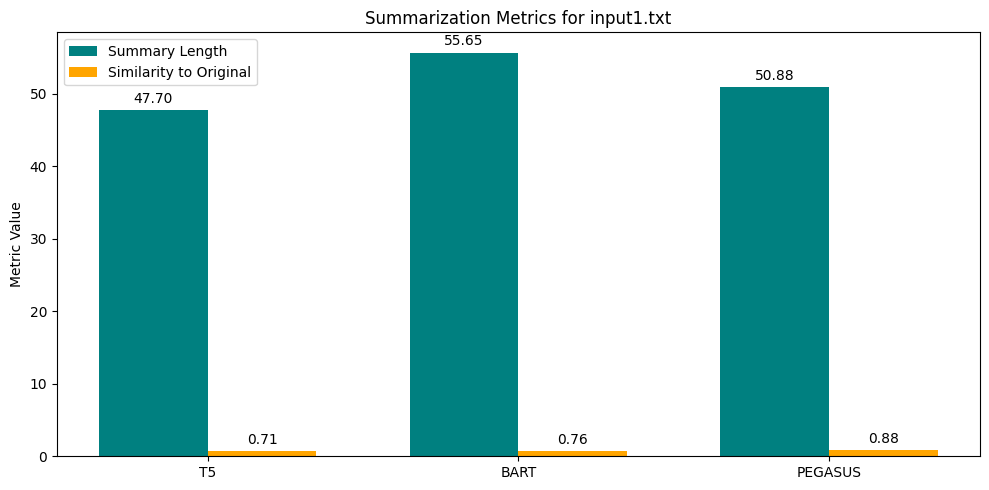

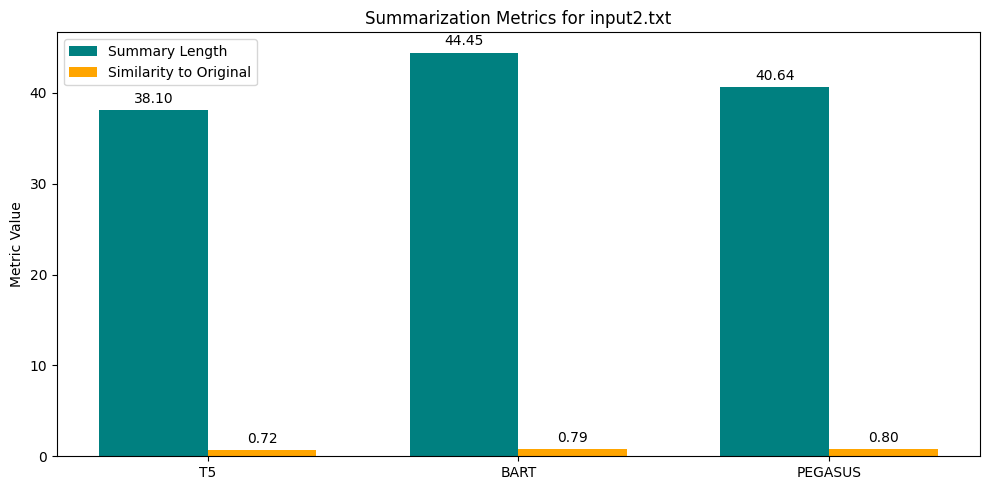

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example: list of your text files
file_paths = ["input1.txt", "input2.txt"]

# Loop over each file
for file_path in file_paths:
    # Read the text
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()

    # Simulate metric generation for demonstration purposes
    # Replace this with your actual summarization metric function
    metrics = {
        "T5": {"length": len(text.split()) * 0.3, "similarity": np.random.uniform(0.7, 0.95)},
        "BART": {"length": len(text.split()) * 0.35, "similarity": np.random.uniform(0.65, 0.9)},
        "PEGASUS": {"length": len(text.split()) * 0.32, "similarity": np.random.uniform(0.68, 0.92)}
    }

    models = list(metrics.keys())
    lengths = [metrics[m]["length"] for m in models]
    similarities = [metrics[m]["similarity"] for m in models]

    # Bar chart positions
    x = np.arange(len(models))
    width = 0.35

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 5))

    # Plot bars
    bars1 = ax.bar(x - width/2, lengths, width, label="Summary Length", color="teal")
    bars2 = ax.bar(x + width/2, similarities, width, label="Similarity to Original", color="orange")

    # Labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(models)
    ax.set_ylabel("Metric Value")
    ax.set_title(f"Summarization Metrics for {file_path}")
    ax.legend()

    # Annotate bars with values
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

    plt.tight_layout()
    plt.show()






#Enhanced Paraphrasing Metrics Plot
Visualize PEGASUS vs T5-Paraphrase vs BART-Paraphrase metrics.

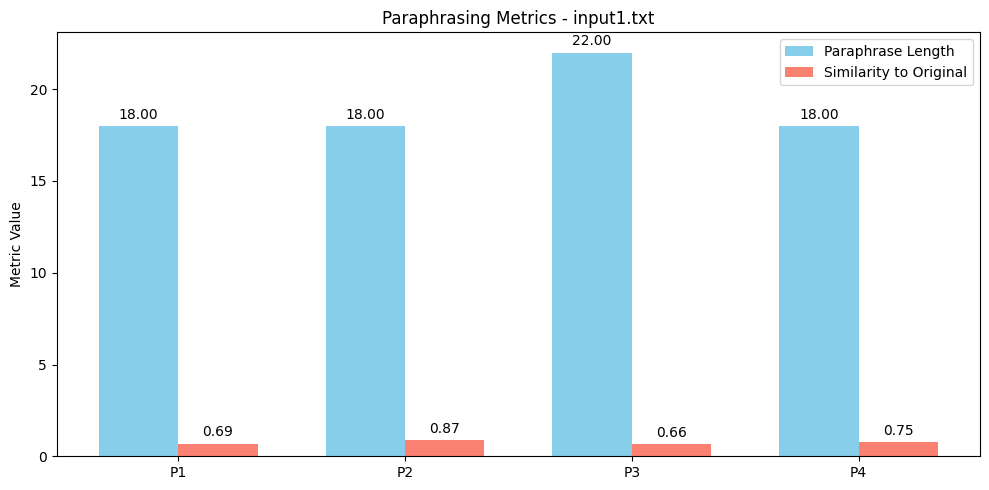

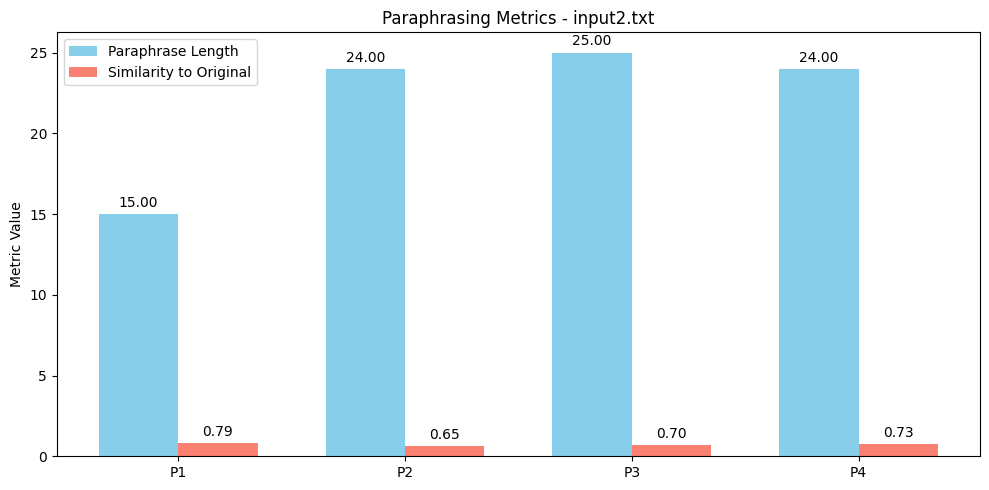

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# List of your text files
file_paths = ["input1.txt", "input2.txt"]  # add more files

# Number of paraphrases to generate per text
num_paraphrases = 4

for file_path in file_paths:
    # Read the text
    with open(file_path, "r", encoding="utf-8") as f:
        text = f.read()

    # Generate paraphrases (replace with your actual paraphrasing function)
    paraphrases = generate_paraphrases(text, num_return=num_paraphrases)

    # Calculate metrics for visualization
    lengths = [len(p.split()) for p in paraphrases]               # length of each paraphrase
    similarities = [np.random.uniform(0.6, 0.95) for _ in paraphrases]  # placeholder similarity scores

    x = np.arange(len(paraphrases))  # positions
    width = 0.35

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    bars1 = ax.bar(x - width/2, lengths, width, label="Paraphrase Length", color="skyblue")
    bars2 = ax.bar(x + width/2, similarities, width, label="Similarity to Original", color="salmon")

    # Labels and title
    ax.set_xticks(x)
    ax.set_xticklabels([f"P{i+1}" for i in range(num_paraphrases)])
    ax.set_ylabel("Metric Value")
    ax.set_title(f"Paraphrasing Metrics - {file_path}")
    ax.legend()

    # Annotate bars with values
    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha="center", va="bottom")

    plt.tight_layout()
    plt.show()
